# Data Analysis and Classification with Python

This notebook is designed to guide you through a process of data analysis and classification using Python and various scientific and machine learning libraries. 

## Project Overview

In this project, we aim to classify whether a player is playing padel or tennis based on various variables such as acceleration on the court, speed, and other relevant metrics. By analyzing these variables, we can build a machine learning model that accurately distinguishes between the two sports.

### Importing Libraries

Below, we describe each of the libraries and modules we have imported and how we will use them throughout the analysis.

In [170]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statistics import median
from sklearn import svm, decomposition
from numpy.fft import fft, ifft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


### Loading and Processing Data for Tennis and Padel Classification

In this section, we load the data for tennis and padel games and apply Fast Fourier Transform (FFT) to the acceleration data. This helps us to analyze the frequency components of the acceleration signals, which can be useful features for classification.

In [171]:
df_t = pd.read_csv("C:\\Users\\luisg\\OneDrive\\Escritorio\\Useful Code\\PaddleTennisAI\\tl\\tl0.csv")
X_tenis = fft(df_t['X'])
Y_tenis = fft(df_t['Y'])
Z_tenis = fft(df_t['Z'])

df_p = pd.read_csv("C:\\Users\\luisg\\OneDrive\\Escritorio\\Useful Code\\PaddleTennisAI\\pl\\p0.csv")
X_padel = fft(df_p['X'])
Y_padel = fft(df_p['Y'])
Z_padel = fft(df_p['Z'])

### Frequency Analysis of Tennis and Padel Players' Movements

In this section, we perform a first analysis of the frequency characteristics of the movements for both tennis and padel players.

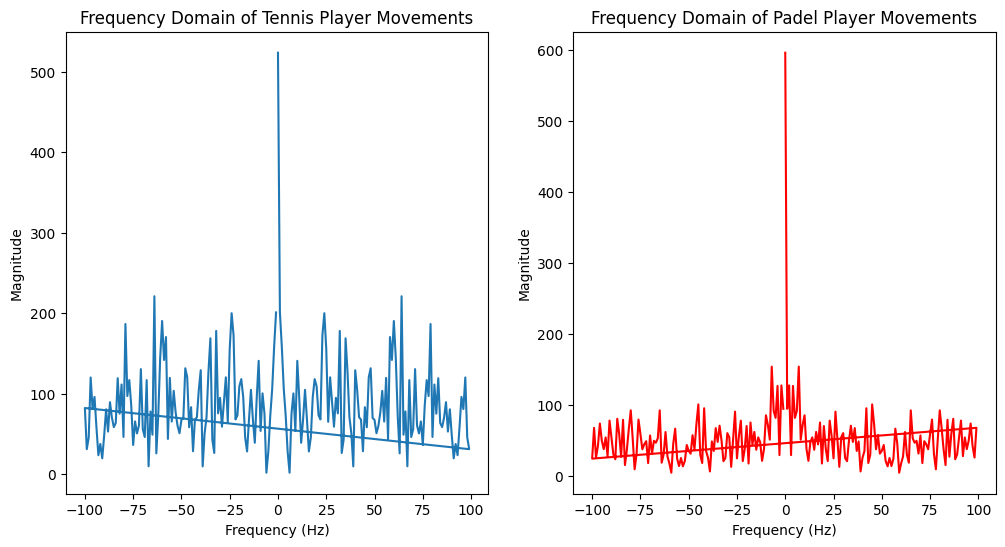

In [172]:
# Sampling rate
sr = 200
N = len(X_tenis)

# Extracted features
yft = X_tenis
xft = fftfreq(N, d=1./sr)

# Plot frequency domain
yfp = X_padel
xfp = fftfreq(N, d=1./sr)

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.plot(xft, np.abs(yft))
plt.title('Frequency Domain of Tennis Player Movements')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(122)
plt.plot(xfp, np.abs(yfp), 'r')
plt.title('Frequency Domain of Padel Player Movements')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.show()

### Frequency and Time Domain Analysis of Tennis Player Movements

In this section, we analyze the frequency and time domain representations of the acceleration data for a tennis player. This analysis helps us understand both the frequency components and the original time-domain signal after applying the Inverse Fast Fourier Transform (IFFT).

c:\Users\luisg\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\luisg\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


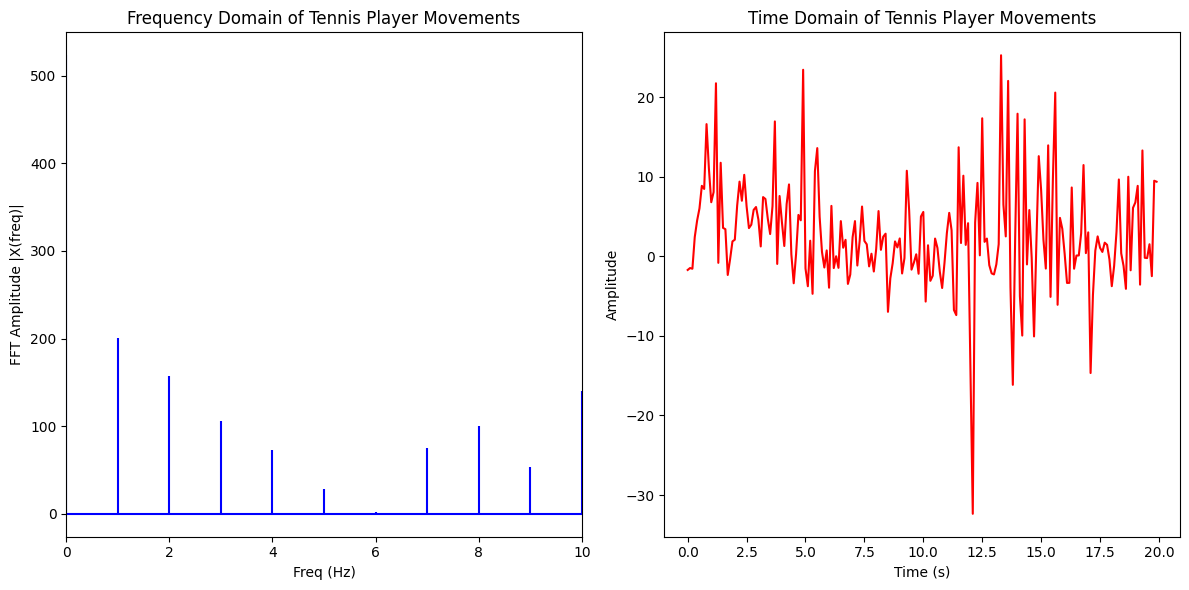

In [173]:
n = np.arange(N)
T = N/sr
ts = 20.0/sr
t = np.arange(0,20,ts)
freq = n/T

# Different graphics to analyze the data set
plt.figure(figsize=(12, 6))

# Frequency Domain Plot
plt.subplot(121)
plt.stem(freq, np.abs(X_tenis), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.title('Frequency Domain of Tennis Player Movements')

# Time Domain Plot
plt.subplot(122)
plt.plot(t, ifft(X_tenis), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain of Tennis Player Movements')

plt.tight_layout()
plt.show()

### Frequency and Time Domain Analysis of Padel Player Movements

In this section, we analyze the frequency and time domain representations of the acceleration data for a padel player. This analysis helps us understand both the frequency components and the original time-domain signal after applying the Inverse Fast Fourier Transform (IFFT).

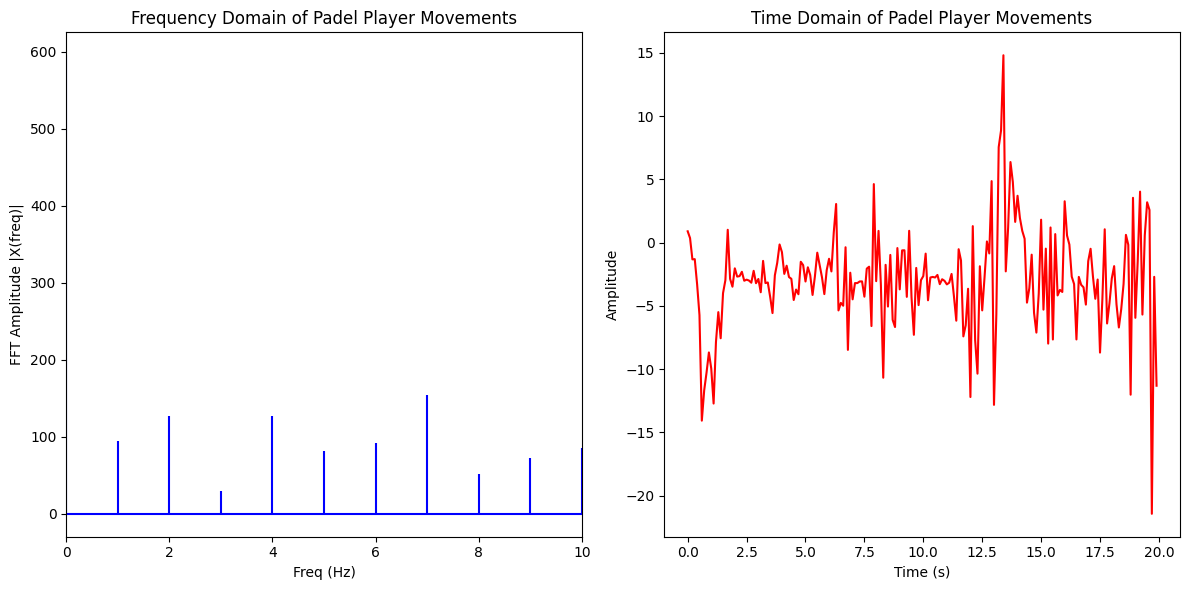

In [174]:
plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X_padel), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.title('Frequency Domain of Padel Player Movements')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X_padel), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Time Domain of Padel Player Movements')
plt.tight_layout()
plt.show()

### Counting CSV Files in a Folder Function

In this section, we define a function to count the number of CSV files in a given folder. This is useful for verifying the number of data files available for analysis.

In [175]:
def count_csv_files(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out files that end with '.csv'
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Return the count of CSV files
    return len(csv_files)

### Converting Samples to Dataset with Appropriate Features

In this section, we convert raw acceleration data samples for tennis and padel into a structured dataset with relevant features. This dataset will be used for classification tasks to distinguish between tennis and padel players.

In [176]:
#Convert samples to data set, with appropiate features
folder_path = "C:\\Users\\luisg\\OneDrive\\Escritorio\\Useful Code\\PaddleTennisAI"

tl_count = count_csv_files(folder_path + "\\tl")
tenis_samples = range(0, tl_count)

pl_count = count_csv_files(folder_path + "\\pl")
padel_samples = range(tl_count, tl_count + pl_count)

elements = np.empty([tl_count + pl_count,8])
results = np.empty((tl_count + pl_count,1), str)

for i in tenis_samples:
  df_t = pd.read_csv(f'{folder_path}\\tl\\tl{str(i)}.csv')
  df_t = df_t.drop('Timestamp', axis=1)
  Acc = df_t.to_numpy()
  Acc2 = np.linalg.norm(Acc,axis=1)

  freq_Acc = fft(Acc2)

  elements[i,0] = sum(np.power(abs(freq_Acc),2))
  elements[i,1] = abs(freq_Acc).max()
  elements[i,2] = median(abs(freq_Acc))
  elements[i,3] = np.std(abs(freq_Acc))


  elements[i,4] = sum(np.power(Acc2,2))
  elements[i,5] = Acc2.max()
  elements[i,6] = median(Acc2)
  elements[i,7] = np.std(Acc2)

  results[i,0] = "Tenis"

for i in padel_samples:
  df_p = pd.read_csv('C:\\Users\\luisg\\OneDrive\\Escritorio\\Useful Code\\PaddleTennisAI\\pl\\p'+str(i-tl_count)+'.csv')
  df_p = df_p.drop('Timestamp', axis=1)
  Acc = df_p.to_numpy()
  Acc2 = np.linalg.norm(Acc,axis=1)

  freq_Acc = fft(Acc2)

  elements[i,0] = sum(np.power(abs(freq_Acc),2))
  elements[i,1] = abs(freq_Acc).max()
  elements[i,2] = median(abs(freq_Acc))
  elements[i,3] = np.std(abs(freq_Acc))


  elements[i,4] = sum(np.power(Acc2,2))
  elements[i,5] = Acc2.max()
  elements[i,6] = median(Acc2)
  elements[i,7] = np.std(Acc2)

  results[i,0] = "Padel"

### Creating a DataFrame with Extracted Features

In this section, we add a column indicating the sport (tennis or padel) for each sample. This structured DataFrame will be used for further analysis and model training.

In [177]:
df = pd.DataFrame(elements,
             columns = ['Sum of squared FFT amplitudes of the L2 norm','Maximum FFT amplitude of the L2 norm','Median FFT amplitude of the L2 norm',
             'Standard deviation of FFT amplitudes of the L2 norm','Sum of squared L2 norm','Maximum value of the L2 norm',
             'Median value of the L2 norm','	Standard deviation of the L2 norm'])
df["Sport"] = results

df.head()

,Maximum Acceleration X,Maximum Acceleration Y,Maximum Acceleration Z,Maximum Acceleration X,Mean Acceleration Y,Mean Acceleration Z,l,c,Sport
0,1.183339e+07,2816.783291,116.450725,201.713936,59166.974682,49.948797,11.377819,9.873103,T
1,8.900903e+06,2504.566234,103.863333,177.261653,44504.514773,50.378287,10.077711,8.105632,T
2,8.823472e+06,2437.216885,102.249632,171.720281,44117.358560,62.871944,10.246047,8.490356,T
3,8.829125e+06,2461.328805,103.000448,174.506369,44145.626147,52.067383,9.982632,8.323139,T
4,9.373061e+06,2593.105955,92.363996,184.909548,46865.306996,45.397568,10.231405,8.137664,T


In [178]:
df_num = df.drop(["Sport"],axis = 1)

df_num.head()

,Maximum Acceleration X,Maximum Acceleration Y,Maximum Acceleration Z,Maximum Acceleration X,Mean Acceleration Y,Mean Acceleration Z,l,c
0,1.183339e+07,2816.783291,116.450725,201.713936,59166.974682,49.948797,11.377819,9.873103
1,8.900903e+06,2504.566234,103.863333,177.261653,44504.514773,50.378287,10.077711,8.105632
2,8.823472e+06,2437.216885,102.249632,171.720281,44117.358560,62.871944,10.246047,8.490356
3,8.829125e+06,2461.328805,103.000448,174.506369,44145.626147,52.067383,9.982632,8.323139
4,9.373061e+06,2593.105955,92.363996,184.909548,46865.306996,45.397568,10.231405,8.137664


In [179]:
#PCA with standarized data
X = df_num.values
X = (X-X.mean(axis=0))/X.std(axis=0) #standardizing data

y = df["Sport"]

df_sca = StandardScaler().fit_transform(df_num)
components = df_num.shape[1]

pca = decomposition.PCA(n_components=components).fit(df_sca)
100*pca.explained_variance_ratio_

100*pca.explained_variance_ratio_.cumsum()

array([ 92.59389134,  97.3233324 ,  99.31713711,  99.7770007 ,
        99.93428624,  99.99294597, 100.        , 100.        ])

In [180]:
vec = pca.components_

Xproj = pca.transform(df_sca)
dfpca = pd.DataFrame(Xproj[:,0:2],columns=['PCA1','PCA2'])
dfpca.head()

,PCA1,PCA2
0,0.823326,1.145946
1,-1.004097,-0.162541
2,-0.812676,-0.480938
3,-1.077769,-0.340078
4,-0.902498,0.281049


In [181]:
#Splitting in train and test with the projection obtained
Xtrain, Xtest, ytrain, ytest = train_test_split(Xproj[:,0:2], y, train_size=0.8,random_state = 15)

print('Training observations = {}'.format(Xtrain.shape[0]))
print('Test observations = {}'.format(Xtest.shape[0]))

Training observations = 66
Test observations = 17


In [182]:
#clf = svm.SVC(kernel = 'sigmoid')
clf = svm.SVC(gamma=1,C=1,kernel='rbf')
clf.fit(Xtrain,ytrain)

yfit = clf.predict(Xtest)

print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

           P       0.89      0.89      0.89         9
           T       0.88      0.88      0.88         8

    accuracy                           0.88        17
   macro avg       0.88      0.88      0.88        17
weighted avg       0.88      0.88      0.88        17



In [183]:
#Print the scores and results
acc_scores = cross_val_score(clf,Xtest,ytest, cv=5,scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (acc_scores.mean(),acc_scores.std()/np.sqrt(5)))

f1_scores = cross_val_score(clf,Xtest,ytest, cv=5,scoring = 'f1_macro')
print("F1-score: %0.2f (+/- %0.2f)" % (f1_scores.mean(),f1_scores.std()/np.sqrt(5)))

Accuracy: 0.90 (+/- 0.05)
F1-score: 0.89 (+/- 0.06)


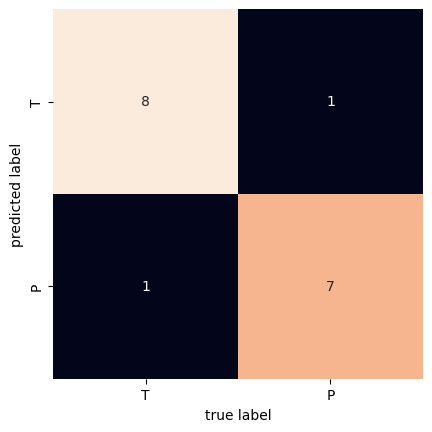

In [184]:
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True,annot=True, fmt='d', cbar=False,
            xticklabels=["T","P"],
            yticklabels=["T","P"])
plt.xlabel('true label')
plt.ylabel('predicted label');

C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\2564569515.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=w, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\2564569515.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=w, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\2564569515.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=w, zorder=10, cmap=plt.cm.Paired, edgecolors="k")
C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\2564569515.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=w, zorder=10, cmap=plt.cm.Paired, edgecolors="

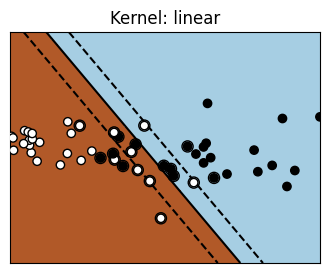

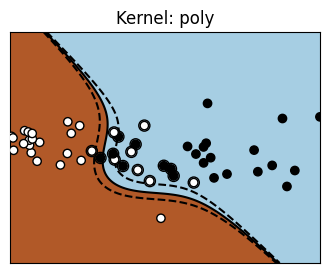

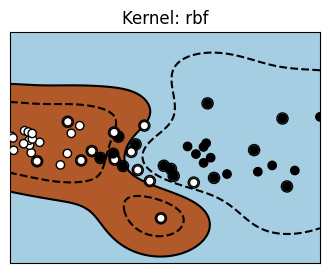

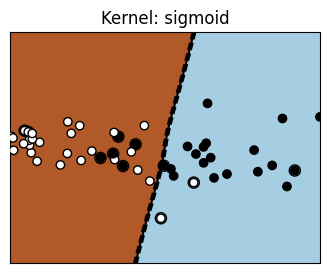

In [185]:
#Choose better kernel graphically
# figure number
fignum = 1

w = ytrain
w[w=='T'] = 'k'
w[w=='P'] = 'w'

# fit the model
for kernel in ("linear", "poly", "rbf","sigmoid"):
    clf = svm.SVC(kernel=kernel, gamma=1, C=1)
    clf.fit(Xtrain, ytrain)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=64,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=w, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title('Kernel: '+str(kernel))
    fignum = fignum + 1
plt.show()

In [186]:
#Apply weights
def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        Xtrain[:, 0],
        Xtrain[:, 1],
        c=w,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)

In [187]:
sample_weight_last_ten = abs(np.random.randn(len(Xtrain)))
sample_weight_constant = np.ones(len(Xtrain))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 5
sample_weight_last_ten[9] *= 15

C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\858058082.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(
C:\Users\luisg\AppData\Local\Temp\ipykernel_2696\858058082.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axis.scatter(


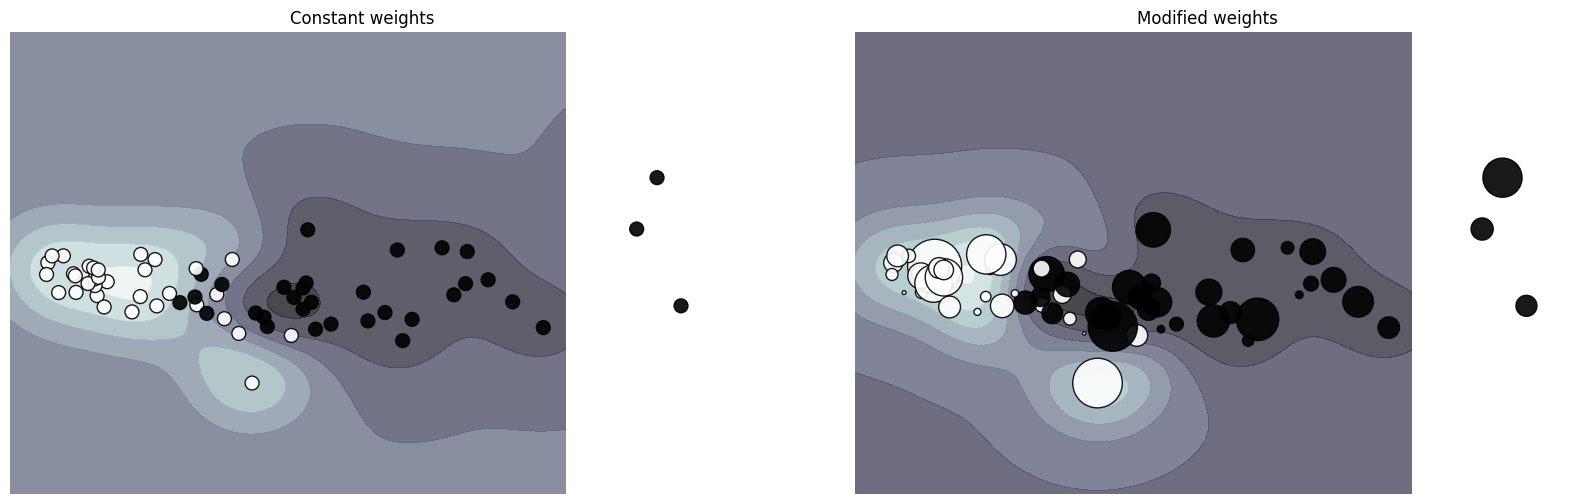

In [188]:
# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(gamma=1,C=1,kernel='rbf')
clf_no_weights.fit(Xtrain, ytrain)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(gamma=1,C=1,kernel='rbf')
clf_weights.fit(Xtrain, ytrain, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()

In [189]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000, 10000, 100000],
    'gamma': ['scale' , 10, 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','sigmoid','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = 'f1_macro',scoring = 'f1_macro' ,verbose = 3)

# fitting the model for grid search
grid.fit(Xtrain, ytrain)

# print best parameter after tuning
print(grid.best_params_)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.854 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.690 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.921 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.845 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.921 total time=   0.0s
[CV 1/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.854 total time=   0.0s
[CV 2/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 3/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 4/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.845 total time=   0.0s
[CV 5/5] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.921 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.854 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linea

In [190]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=0.1, gamma=10, kernel='sigmoid')
